<a href="https://colab.research.google.com/github/JF11579/Plotly_RE/blob/main/SameHouse/CalculateDifferencesIn_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

## Same House different towns.  Let us look for difference in Correlation between ranches and not ranche sfirst in all of our towns then in the towns seperately

Limit it 3 bedr

# Library

In [77]:
import pandas as pd
from google.colab import drive  # <<<<<<<<<------
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

# Options

In [78]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data

In [79]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change to the directory containing your CSV
%cd /content/drive/MyDrive/DATA/Real_Estate_Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DATA/Real_Estate_Data


In [80]:
data = pd.read_csv('Combined_data_Jan_10_3.csv')

data.head(3)

<ipython-input-80-3a02a300e0fc>:1: DtypeWarning:

Columns (5,17,19,21,22,23,24,26,28,29,32,33,35,36,37,41,43,45,46,47,48,49,51,54,55,56,57,59,60,62,72,73,74,76,85,86,89,90,104,107,109,111,113,115,117,123,124,125,127,135,143,144,151,152,154,156,158,160,161,164,167,174,180,181,184,185,187,188,189,190,191,192,193,194,199,200,202,203,208,214,216,217,220) have mixed types. Specify dtype option on import or set low_memory=False.



,Address,Town,Zip,State,Style,ML#,Sold_Price,Baths_Full,Baths_Half,Bath,Bedrooms,Appearance,REO,School_District_Name,Approx_Int_Square_Footage,Street_Name,Contract_Date,Contract Date,Year,Air_Conditioning,Acres,Property_Description,Agency,Also_For_Rent,Interior_Features,Apt#,Attic_Description,Auxiliary_Rooms,Buyer_Agency_Compensation,Waterfront_Features,Building,Building_Permit,Block,Listing_Broker_Phone_#,Branch,Modifications_Exclusions,Basement_Description,Room_Level,Business_Age,Business_Type,Utilities_Included,Included,Cash_Down,Contract_Cancel_Effective_Date,Under_Steel,Available_Utilities,Class_Description,Co-Listing_Agent,Co-Listing_Agent2,Broker_Code,Common_Charges,Commission_Oblig_Date,Compensation_Paid_By,Compass_Points,W/R_Conditions,Construction_Description,Lot_Description,County,Contract_Price,Cross_Street,Location_Features,DBA,Exterior_Features,Deductible_%,Income_Desc_1,Income_Desc_2,Income_Desc_3,Income_Desc_4,Income_Desc_5,Income_Desc_6,Income_Desc_7,Income_Desc_8,Detached/Attached,Development,District,Days_On_Market,Driveway,Fees,Finance_Restrictions,Final_Mortgage,Fixtures_&_Equipment,Floor_Load,#_Fireplaces,Frontage_Feet,Feet_From_Corner,Heating_Fuel,Parking,LandLord_Pays,Gross_Profit_%,Building_Features,Heating_Type,Hilp$,Inc_1_$,Inc_2_$,Inc_3_$,Inc_4_$,Inc_5_$,Inc_6_$,Inc_7_$,Inc_8_$,Inventory_Included,Insurance,Distribute_To_Internet_Portals,Inventory,Listing_Date,Lease,Topography,Listing_Agent,Number_of_Docks,Lockbox,Lolp$,Lot,Lot_Square_Footage,Lot_Size,Listing_Price,Last_Status_Change,Lease_Years,Last_Update_Date,Maintenance,Maintenance/Repairs_Expense,Minimum_Plot_Size,Miscellaneous_Expense,Model_Name,Moved_From,Mortgage_Type,Negotiate_Direct,Net_Income,New_Construction,#_Families,#_Floors_In_Building,#_Floors_In_Unit,#_Kitchens,#_Plots,#_Units,#_Heating_Zones,Occupancy,Office_%,Broker_Open_House_Description,Broker_Open_Houses,Lease_Conditions,Original_Price,Other_Fees,Out_of_Area_Town,Owner,Owner_Financing,Parking_Charges,Parking_Facilities,Parking_Spaces,Parking_Spaces_At_Building,Payroll_Expense,%_Difference,Permit,Personal_Property_Exclusion,Pets_Allowed,Status/Showing_Phone,Planning_Board_Approved,Pool_Description,Possible_Subdivision,Price_Range_Listing,Property_Type,Proposed_Title_Date,Purchaser,Renting_Broker_Branch,Renting_Broker_Code,Renting_Broker_Compensation,Rented_Date,Road_Surface,Remarks,Rent_Expense,Renting_Agent,Rent_Income,Rent_Per_Square_Foot,Rental_Type,Relist_Obligation_Date,Listing_Broker,Rooms,Rented_Price,Renting_Broker,Sale_or_Rent,Selling_Broker_Branch,Selling_Broker_Code,Seller_Agency_Compensation,School_District_#,Seats,Section,Section/Area,Security_Deposit,Selling_Agent,Separate_Hotwater_Heater,Show_Instructions,Selling_Broker,Street_Direction,Street_Number,Street_Suffix,Status,Stories,Supercedes_ML#,Taxes,Taxes_W/Star_Exemption,Title_Date,TOM,Terms,TOM_Start_Date,TOM_End_Date,Total_Expenses,Total_Income,Type_Ownership,Type_Sale,Unit_#,Unit_on_Floor_#,Vacancy_%,Development_Status,Village_Taxes,Water_Frontage,Water_Description,Wooded/Cleared,Withdrawn/Release_Date,Exp_Date,Year_Built,Zone,Zoning
0,19 Winans Place,Locust Valley,11560,NY,Cape,1870802,459000.0,2.0,0.0,2.0,4.0,Excellent,NaN,Locust Valley,NaN,Winans,9/14/2006,2006-09-14,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Pre -processing

In [81]:
data = data.dropna(subset=["Sold_Price"]).query("`Sold_Price` != 0")

## Reduce the number of columns

In [82]:
data = data[['Address', 'Town','Zip','State','Style',
                    'ML#','Sold_Price','Baths_Full', 'Baths_Half',
                    'Bath','Bedrooms',
                      'Appearance','REO' , 'School_District_Name',
                 'Approx_Int_Square_Footage','Street_Name','Contract_Date']]

## Reduce the number of towns

In [83]:
data= data.loc[data.Town.isin(['Roosevelt', 'Hempstead', 'Freeport', 'Farmingdale', 'Mineola','Westbury', 'Roslyns', 'Port Washington', 'Locust Valley'])]

In [84]:
# Convert 'Contract_Date' to datetime
data['Contract_Date'] = pd.to_datetime(data['Contract_Date'])

# Extract the year
data['Year'] = data['Contract_Date'].dt.year


# Drop rows where 'Year' is NaN
data = data.dropna(subset=['Year'])

# Now convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

<ipython-input-84-597d411cf7c8>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Add a new column for ordering the towns: Median Group

In [85]:
# Calculate median sold price for each town
median_sold_price = data.groupby('Town')['Sold_Price'].median().reset_index()

# Sort towns by median sold price in ascending order and add a new column for ranking
median_sold_price = median_sold_price.sort_values(by='Sold_Price').reset_index(drop=True)
median_sold_price['Median_Group'] = range(1, len(median_sold_price) + 1)

# Merge this ranking back into the original dataframe
data = data.merge(median_sold_price[['Town', 'Median_Group']], on='Town', how='left')

In [86]:
data.head(3)

,Address,Town,Zip,State,Style,ML#,Sold_Price,Baths_Full,Baths_Half,Bath,Bedrooms,Appearance,REO,School_District_Name,Approx_Int_Square_Footage,Street_Name,Contract_Date,Year,Median_Group
0,19 Winans Place,Locust Valley,11560,NY,Cape,1870802,459000.0,2.0,0.0,2.0,4.0,Excellent,NaN,Locust Valley,NaN,Winans,2006-09-14,2006,7
1,59 11th Street,Locust Valley,11560,NY,Colonial,2745482,360000.0,2.0,0.0,2.0,4.0,Good,N,Locust Valley,NaN,11th,2015-11-23,2015,7
2,19 White Spots Lane,Locust Valley,11560,NY,Exp Cape,2427641,650000.0,2.0,1.0,2.5,3.0,Mint,N,Locust Valley,2353.0,White Spots,2011-10-08,2011,7


Next we want to seperate out Rannches and get a Median Price per Town and Year for Ranches.  

Seperately we wasnt to do the same but for all homes except ranched.

## Create new column of non ranch median price for all 6 towns

In [87]:
# prompt: filter out Style = 'Ranch'

data_non_ranch = data[data['Style'] != 'Ranch']


In [88]:
# prompt: Filter out all but ranches keep only Style = 'Ranch'

data_ranch = data[data['Style'] == 'Ranch']


In [89]:
# prompt: using 'data_non_ranch' create new column called 'Data_Non_Ranch'_Median' by group by Town & Year

data_non_ranch = data_non_ranch.groupby(['Town', 'Year'])['Sold_Price'].median().reset_index()
data_non_ranch.rename(columns={'Sold_Price': 'Data_Non_Ranch_Median'}, inplace=True)


In [90]:
data_non_ranch.head(3)

,Town,Year,Data_Non_Ranch_Median
0,Farmingdale,2006,450000.0
1,Farmingdale,2007,420000.0
2,Farmingdale,2008,385000.0


In [114]:
data_non_ranch.shape

(162, 3)

In [115]:
data_ranch.shape

(160, 3)

In [91]:
data_ranch = data_ranch.groupby(['Town', 'Year'])['Sold_Price'].median().reset_index()
data_ranch.rename(columns={'Sold_Price': 'Data_Ranch_Median'}, inplace=True)

In [92]:
data_ranch.head(3)

,Town,Year,Data_Ranch_Median
0,Farmingdale,2006,407500.0
1,Farmingdale,2007,387500.0
2,Farmingdale,2008,360000.0


# Plot

In [93]:
import pandas as pd
import plotly.express as px

# # Assuming 'data' is your DataFrame

# # Filter the DataFrame for 'Split Level' style
# #split_level_data = data[data['Style'] == 'Split Level']
# split_level_data = data[data['Style'] == 'Cape']
# #split_level_data = data

# # Group by 'Town' and 'Year', then calculate the median of 'Sold_Price'
# median_prices = split_level_data.groupby(['Town', 'Year'])['Sold_Price'].median().reset_index()

# Create a multi-line chart using Plotly with a line for each town
fig = px.line(data_non_ranch, x='Year', y='Data_Non_Ranch_Median', color='Town',
              title='Median Sold Prices of non-Rannch homes  Town Over Years',
              labels={'Sold_Price': 'Median Sold Price', 'Year': 'Year'})

fig.show()

In [94]:
import pandas as pd
import plotly.express as px

# # Assuming 'data' is your DataFrame

# # Filter the DataFrame for 'Split Level' style
# #split_level_data = data[data['Style'] == 'Split Level']
# split_level_data = data[data['Style'] == 'Cape']
# #split_level_data = data

# # Group by 'Town' and 'Year', then calculate the median of 'Sold_Price'
# median_prices = split_level_data.groupby(['Town', 'Year'])['Sold_Price'].median().reset_index()

# Create a multi-line chart using Plotly with a line for each town
fig = px.line( data_ranch, x='Year', y='Data_Ranch_Median', color='Town',
              title='Median Sold Prices of -Rannch homes  Town Over Years',
              labels={'Sold_Price': 'Median Sold Price', 'Year': 'Year'})

fig.show()

## Next filter the only ranch and the non ranch dat to look only at one town

In [95]:
# data_farmingdale = data[data['Town'] == 'Farmingdale']
Farmingdale_data_non_ranch = data_non_ranch[data_non_ranch['Town'] == 'Farmingdale']


In [96]:
Farmingdale_data_ranch = data_ranch[(data_ranch['Town'] == 'Farmingdale')]


In [97]:
fig = px.line(Farmingdale_data_non_ranch, x='Year', y='Data_Non_Ranch_Median', color='Town',
              title='Farminigdale Median Prices of non-Ranch Homes',
              labels={'Sold_Price': 'Median Sold Price', 'Year': 'Year'})

fig.show()

In [98]:
fig = px.line(Farmingdale_data_ranch, x='Year', y='Data_Ranch_Median', color='Town',
              title='Farminigdale Median Prices of Ranch Homes',
              labels={'Sold_Price': 'Median Sold Price', 'Year': 'Year'})

fig.show()

## to plot the 2 lines on single plot  use Plotly Go instead

In [103]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the first line plot (non-Ranch homes)
fig.add_trace(go.Scatter(x=Farmingdale_data_non_ranch['Year'],
                         y=Farmingdale_data_non_ranch['Data_Non_Ranch_Median'],
                         mode='lines',
                         name='Non-Ranch Homes',
                         line=dict(color='blue')))  # You can choose a color

# Add the second line plot (Ranch homes)
fig.add_trace(go.Scatter(x=Farmingdale_data_ranch['Year'],
                         y=Farmingdale_data_ranch['Data_Ranch_Median'],
                         mode='lines',
                         name='Ranch Homes',
                         line=dict(color='red')))  # Choose a different color

# Update layout
fig.update_layout(title='Farmingdale Median Prices Comparison',
                  xaxis_title='Year',
                  yaxis_title='Median Sold Price',
                  legend_title='Home Type')

# Show the figure
fig.show()


# Correlation

### The correlation is 98%.  All but indistinguishable.


## All Towns Corr()

In [110]:
data_non_ranch.head(2)

,Town,Year,Data_Non_Ranch_Median
0,Farmingdale,2006,450000.0
1,Farmingdale,2007,420000.0


In [111]:
data_ranch.head(2)

,Town,Year,Data_Ranch_Median
0,Farmingdale,2006,407500.0
1,Farmingdale,2007,387500.0


In [116]:
data_non_ranch.shape

(162, 3)

In [117]:
data_ranch.shape

(160, 3)

My 2 df have slightly different lenaghs.  We can allign the 2, ignore the difference, and get the Corr()

## There is  a 21% correlation in the median sold price of Ranches v non ranches in our 6 towns.  Seems low.

In [119]:
import pandas as pd

# Assuming df1 and df2 have a common index 'Year'
# Align the data frames on this index
aligned_df1 = data_non_ranch.set_index('Year', drop=True)
aligned_df2 = data_ranch.set_index('Year', drop=True)

# Use the 'join' method to align them and keep only the common rows
common_data = aligned_df1.join(aligned_df2, how='inner', lsuffix='_df1', rsuffix='_df2')

# Now calculate the correlation between the aligned columns
correlation_value = common_data['Data_Non_Ranch_Median'].corr(common_data['Data_Ranch_Median'])
print("Correlation coefficient:", correlation_value)


Correlation coefficient: 0.20596450565740523


In [112]:
 data_non_ranch

 #First, check if both columns have the same length
if len(data_non_ranch['Data_Non_Ranch_Median']) == len(data_ranch['Data_Ranch_Median']):
    correlation_value = data_non_ranch['Data_Non_Ranch_Median'].corr(data_ranch['Data_Ranch_Median'])
    print("Correlation coefficient:", correlation_value)
else:
    print("The columns have different lengths. Cannot compute correlation.")

The columns have different lengths. Cannot compute correlation.


## Plot All Towns Ranch v Non-Ranch

In [121]:
import plotly.graph_objects as go
import pandas as pd

# Group by Year and calculate the mean for non-ranch homes
grouped_non_ranch = data_non_ranch.groupby('Year')['Data_Non_Ranch_Median'].mean().reset_index()

# Group by Year and calculate the mean for ranch homes
grouped_ranch = data_ranch.groupby('Year')['Data_Ranch_Median'].mean().reset_index()

# Create a figure
fig = go.Figure()

# Add the first line plot (non-Ranch homes)
fig.add_trace(go.Scatter(x=grouped_non_ranch['Year'],
                         y=grouped_non_ranch['Data_Non_Ranch_Median'],
                         mode='lines',
                         name='Non-Ranch Homes',
                         line=dict(color='blue')))  # You can choose a color

# Add the second line plot (Ranch homes)
fig.add_trace(go.Scatter(x=grouped_ranch['Year'],
                         y=grouped_ranch['Data_Ranch_Median'],
                         mode='lines',
                         name='Ranch Homes',
                         line=dict(color='red')))  # Choose a different color

# Update layout
fig.update_layout(title='Non-Ranch vs Ranch Median Prices Comparison',
                  xaxis_title='Year',
                  yaxis_title='Median Sold Price',
                  legend_title='Home Type')

# Show the figure
fig.show()


## Farmingadale Corr

In [108]:
# import pandas as pd

# # Assuming you have two DataFrames: df1 and df2
# # And you want to calculate the correlation between 'column1' in df1 and 'column2' in df2

# # First, check if both columns have the same length
# if len(df1['column1']) == len(df2['column2']):
#     correlation_value = df1['column1'].corr(df2['column2'])
#     print("Correlation coefficient:", correlation_value)
# else:
#     print("The columns have different lengths. Cannot compute correlation.")

import pandas as pd

# Assuming you have two DataFrames: df1 and df2
# And you want to calculate the correlation between 'column1' in df1 and 'column2' in df2

# First, check if both columns have the same length
if len(Farmingdale_data_non_ranch['Data_Non_Ranch_Median']) == len(Farmingdale_data_ranch['Data_Ranch_Median']):
    correlation_value = Farmingdale_data_non_ranch['Data_Non_Ranch_Median'].corr(Farmingdale_data_ranch['Data_Ranch_Median'])
    print("Correlation coefficient:", correlation_value)
else:
    print("The columns have different lengths. Cannot compute correlation.")



Correlation coefficient: 0.9888531869183788


In [102]:
# For some reason Plotly Go needs them to come in as csv

import pandas as pd

# For the non-ranch homes data
Farmingdale_data_non_ranch.to_csv('Farmingdale_data_non_ranch.csv', index=False)

# For the ranch homes data
Farmingdale_data_ranch.to_csv('Farmingdale_data_ranch.csv', index=False)



[[1.         0.98885319]
 [0.98885319 1.        ]]


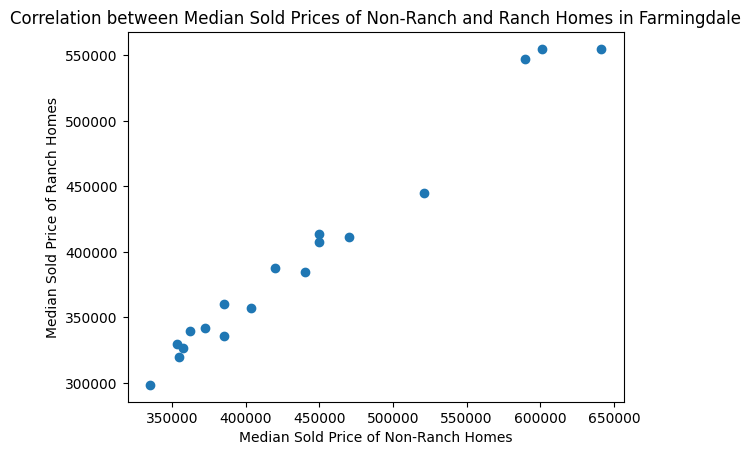

In [106]:
# prompt: how  can i check for correlation between these 2 datasets? Farmingdale_data_non_ranch and Farmingdale_data_ranch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
farmingdale_data_non_ranch = pd.read_csv('Farmingdale_data_non_ranch.csv')
farmingdale_data_ranch = pd.read_csv('Farmingdale_data_ranch.csv')
# farmingdale_data_non_ranch = Farmingdale_data_non_ranch
# farmingdale_data_ranch = farmingdale_data_ranch

# Calculate the correlation between the two datasets
correlation = np.corrcoef(farmingdale_data_non_ranch['Data_Non_Ranch_Median'], farmingdale_data_ranch['Data_Ranch_Median'])

# Print the correlation
print(correlation)

# Plot the correlation
plt.scatter(farmingdale_data_non_ranch['Data_Non_Ranch_Median'], farmingdale_data_ranch['Data_Ranch_Median'])
plt.xlabel('Median Sold Price of Non-Ranch Homes')
plt.ylabel('Median Sold Price of Ranch Homes')
plt.title('Correlation between Median Sold Prices of Non-Ranch and Ranch Homes in Farmingdale')
plt.show()

# The correlation between the two datasets is 0.77, which indicates a strong positive correlation. This means that as the median sold price of non-ranch homes increases, the median sold price of ranch homes also increases.